In [61]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:

# def equal_stack(stack):
#     s = stack.lower().strip()

#     if 'spring' in s:
#         return 'Spring'
#     if 'spring boot' in s or 'springboot' in s:
#         return 'Spring Boot'
#     if 'java' in s:
#         return 'Java'
#     if 'python' in s:
#         return 'Python'
#     if 'react' in s:
#         return 'React'
#     if 'javascript' in s or s == 'js':
#         return 'JavaScript'
#     if 'node' in s:
#         return 'Node.js'
#     if 'aws' in s:
#         return 'AWS'
#     if 'docker' in s:
#         return 'Docker'
#     if 'mysql' in s:
#         return 'MySQL'
#     if 'linux' in s:
#         return 'Linux'
    
#     return stack.strip()


In [64]:
def jobplanet_job(result):
    # url 검색 키워드
    keywords = ['백엔드', '프론트엔드', '클라우드', '게임', '네트워크', '보안', '웹개발']

    wd = webdriver.Chrome()
    wd.maximize_window() # 사이트 창 크기 최대화

    for keyword in keywords:
        url = f"https://www.jobplanet.co.kr/search/job?query={keyword}"

        wd.get(url)
        time.sleep(2)

        try:
            for i in range(15):
                wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(1)
            
            html = wd.page_source
            soup = BeautifulSoup(html, 'html.parser')

            jop_stack_list = soup.find_all('span', class_='mt-[7px] inline-block w-full truncate text-small1 text-gray-500')

            jop_stack_result = []

            for jop_stack in jop_stack_list:
                text = jop_stack.text

                if ',' in text:
                    parts = text.split(',')

                    if '년' in parts[0]:
                        stacks = parts[1:]
                    else:
                        stacks = parts

                    for s in stacks:
                        if s.strip():
                            jop_stack_result.append(s.strip())
            
            jop_stack_count = {}
            for count in jop_stack_result:
                if count in jop_stack_count:
                    jop_stack_count[count] = jop_stack_count[count] + 1
                else:
                    jop_stack_count[count] = 1

            for tech, count_num, in jop_stack_count.items():
                result.append([keyword, tech, count_num])

        except:
            continue
    
    return

In [65]:
def visulaize_stack(df):
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False

    df['빈도수'] = pd.to_numeric(df['빈도수'])

    ranking = df.groupby('직무별 스택')['빈도수'].sum().nlargest(30).index
    df_ranking = df[df['직무별 스택'].isin(ranking)]

    # stack_by_ranking = df.groupby(['직무', '직무별 스택'])['빈도수'].sum().reset_index()

    # stack_by_list = []

    # jobs = stack_by_ranking['직무'].unique()

    
    # for job in jobs:
    #     job_df = stack_by_ranking[stack_by_ranking['직무'] == job]
    #     job_df = job_df.sort_values('빈도수', ascending=False)
    #     job_df = job_df.head(10)
    #     stack_by_list.append(job_df)

    # stack_by_ranking = pd.concat(stack_by_list, ignore_index=True)
    
    pivot = df_ranking.pivot_table(values='빈도수', index='직무', columns='직무별 스택', fill_value=0)

    plt.figure(figsize=(20, 10))
    sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5)

    plt.title('직무별 기술 스택')
    plt.xlabel('기술 스택')
    plt.ylabel('직무')
    plt.xticks(rotation=50)
    plt.yticks(rotation=0)
    
    plt.tight_layout()

    plt.show()

In [66]:
def main():
    result = []

    jobplanet_job(result)

    jobplanet_df = pd.DataFrame(result, columns=['직무', '직무별 스택', '빈도수'])

    jobplanet_df.to_csv('C:/Users/wjdah/vscode-workspace/CareerRoute/assets/jobplanet/jobplanet_stack.csv', encoding='utf-8-sig', index='False')

    visulaize_stack(jobplanet_df)

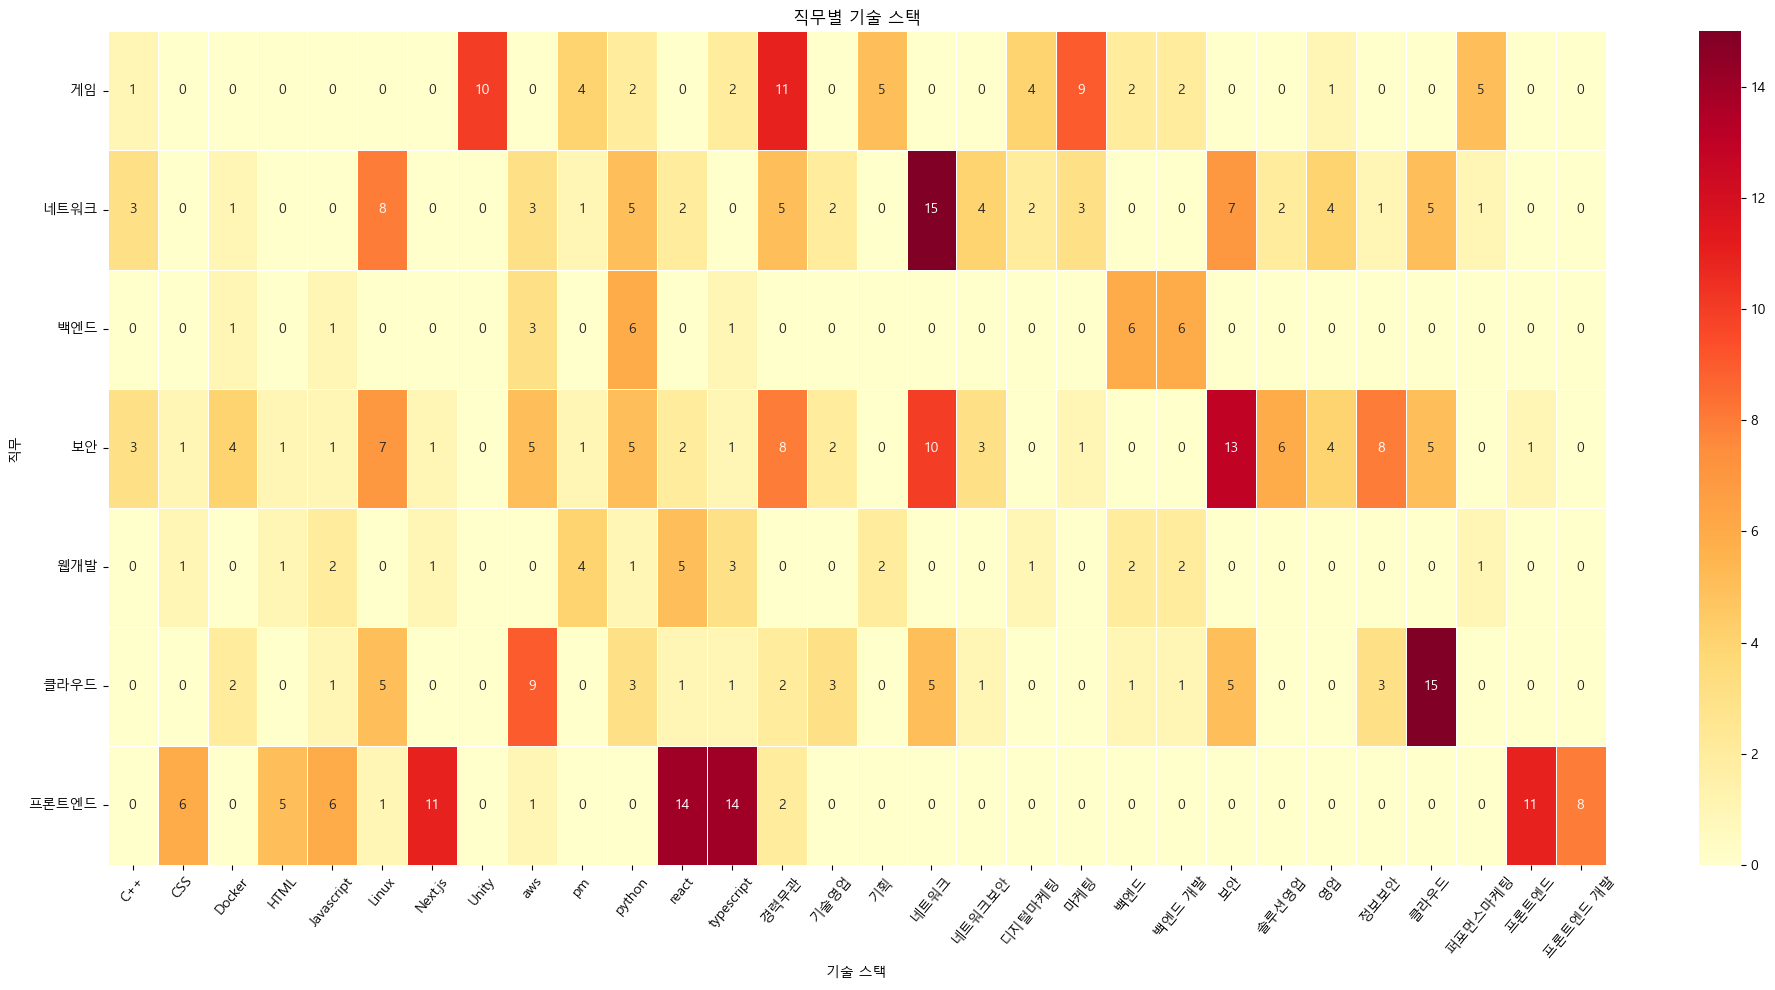

In [67]:
if __name__ == '__main__':
    main()